In [1]:
%pylab inline
import pylab as pb
pylab.ion()
import GPy

Populating the interactive namespace from numpy and matplotlib


In [2]:
f_output1 = lambda x, y: 4. * np.cos(x/5.) - .4*x - 35. + np.random.rand(x.size)[:,None] * 2. + y  
f_output2 = lambda x, y: 6. * np.cos(x/5.) + .2*x + 35. + np.random.rand(x.size)[:,None] * 3. + 2*y

X1 = np.random.rand(100)[:,None]; X1=X1*75
X2 = np.random.rand(100)[:,None]; X2=X2*70 + 30

Y1 = f_output1(X1,X2)
Y2 = f_output2(X1,X2)


#{X,Y} test set for each output
Xt1 = np.random.rand(100)[:,None]*100
Xt2 = np.random.rand(100)[:,None]*100
Yt1 = f_output1(Xt1,Xt2)
Yt2 = f_output2(Xt1,Xt2)

In [3]:
X2d = np.array([(X1.T)[0],(X2.T)[0]]).T

In [4]:
k = GPy.kern.Matern32(2)
k1 = GPy.kern.Bias(2)
k2 = GPy.kern.Linear(2)
icm = GPy.util.multioutput.ICM(input_dim=2,num_outputs=2,kernel=k)
lcm = GPy.util.multioutput.LCM(input_dim = 2,num_outputs=2,kernels_list=[k1,k2,k])
m = GPy.models.GPCoregionalizedRegression([X2d,X2d],[Y1,Y2],kernel=icm)
m.optimize()


 C:\Users\13269\Anaconda3\lib\site-packages\GPy\kern\src\stationary.py:168: RuntimeWarning:overflow encountered in true_divide
 C:\Users\13269\Anaconda3\lib\site-packages\GPy\kern\src\stationary.py:454: RuntimeWarning:overflow encountered in multiply
 C:\Users\13269\Anaconda3\lib\site-packages\GPy\kern\src\stationary.py:454: RuntimeWarning:invalid value encountered in multiply


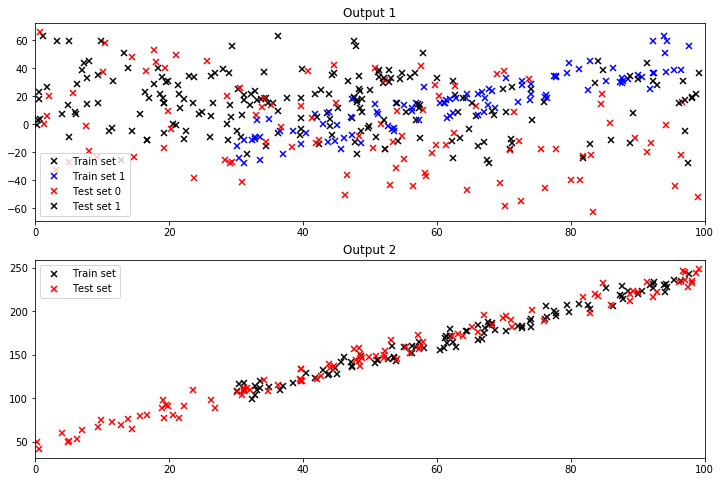

In [5]:
xlim = (0,100); ylim = (0,50)
fig = pb.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
ax1.set_xlim(xlim)
ax1.set_title('Output 1')
ax1.plot(X1[:,0],Y1,'kx',mew=1.5,label='Train set')
ax1.plot(X2[:,0],Y1,'bx',mew=1.5,label='Train set 1')
ax1.plot(Xt1[:,0],Yt1,'rx',mew=1.5,label='Test set 0')
ax1.plot(Xt2[:,0],Y1,'kx',mew=1.5,label='Test set 1')
ax1.legend()
ax2 = fig.add_subplot(212)
ax2.set_xlim(xlim)
ax2.set_title('Output 2')
ax2.plot(X2[:,0],Y2,'kx',mew=1.5,label='Train set')
ax2.plot(Xt2[:,:1],Yt2,'rx',mew=1.5,label='Test set')
ax2.legend()

In [6]:
def plot_2outputs(m,xlim,ylim):
    fig = pb.figure(figsize=(12,8))
    #Output 1
    ax1 = fig.add_subplot(211)
    ax1.set_xlim(xlim)
    ax1.set_title('Output 1')
    m.plot(plot_limits=xlim,fixed_inputs=[(1,0)],which_data_rows=slice(0,100),ax=ax1)
    ax1.plot(Xt1[:,:1],Yt1,'rx',mew=1.5)
    #Output 2
    ax2 = fig.add_subplot(212)
    ax2.set_xlim(xlim)
    ax2.set_title('Output 2')
    m.plot(plot_limits=xlim,fixed_inputs=[(1,1)],which_data_rows=slice(100,200),ax=ax2)
    ax2.plot(Xt2[:,:1],Yt2,'rx',mew=1.5)

In [7]:
print(m)


Name : gp
Objective : 372.41183385886984
Number of Parameters : 8
Number of Optimization Parameters : 8
Updates : True
Parameters:
  gp.                                    |               value  |  constraints  |  priors
  ICM.Mat32.variance                     |   299.7026600182699  |      +ve      |        
  ICM.Mat32.lengthscale                  |  1947.3973791696208  |      +ve      |        
  ICM.B.W                                |              (2, 1)  |               |        
  ICM.B.kappa                            |                (2,)  |      +ve      |        
  mixed_noise.Gaussian_noise_0.variance  |  0.3040334980108251  |      +ve      |        
  mixed_noise.Gaussian_noise_1.variance  |  0.5798420269643747  |      +ve      |        


In [56]:
pre_input = np.asarray([X2d])

In [57]:
pre_input.shape

(1, 100, 2)

In [8]:
m.ICM.B.W

index,gp.ICM.B.W,constraints,priors
[0 0],-242.15778533,,
[1 0],-377.28976572,,


In [58]:
index = np.zeros((100,1))
#index_2 = np.ones((100,1))
index_2 = np.ones((100,1))

In [59]:
#X2_ = np.hstack((pre_input[0],index,index_2))
X2_ = np.hstack((pre_input[0],index))
X2_new = np.hstack((pre_input[0],index_2))

In [60]:
print(X2_.shape)
print(X2_new.shape)

(100, 3)
(100, 3)


In [61]:
mu_, var =m.predict(X2_,Y_metadata={'output_index':np.ones((X2_.shape[0],1)).astype(int)})
mu_2,var_2 = m.predict(X2_new,Y_metadata={'output_index':np.ones((X2_.shape[0],1)).astype(int)})
#mu_3,var_3 = m.predict(X2_tr,Y_metadata={'output_index':np.ones((X2_.shape[0],2)).astype(int)})

In [62]:
np.hstack((np.abs(mu_ - Y1)/Y1,np.abs(mu_2 - Y2)/Y2)) # relative error

array([[ 2.58303426e-03,  3.45042978e-05],
       [ 8.65462948e-03,  3.52423005e-04],
       [ 1.35381379e-02,  2.75022182e-03],
       [-7.05960762e-02,  8.55622508e-03],
       [ 4.43750430e-03,  3.52124206e-04],
       [ 2.76930205e-02,  2.77032198e-03],
       [-3.62054723e-02,  7.41585063e-03],
       [-4.99066545e-03,  3.73121511e-03],
       [ 1.11540919e-01,  6.83023730e-03],
       [ 2.77408075e-02,  1.30910769e-03],
       [ 3.44569163e-03,  5.60473017e-03],
       [ 2.16989367e-01,  4.14919448e-03],
       [ 5.84480473e-02,  1.16232380e-03],
       [ 8.75865878e-03,  4.05428780e-03],
       [ 1.92690399e-02,  4.66938619e-04],
       [-1.27427599e-01,  2.42796409e-04],
       [ 3.52255952e-03,  2.73755934e-03],
       [ 7.16694555e-03,  1.11032211e-03],
       [ 1.87630055e-03,  1.15254412e-03],
       [ 1.82620166e-02,  6.01165985e-03],
       [ 1.37764613e-02,  4.15028956e-03],
       [-2.27701470e-01,  5.64654184e-03],
       [-2.99373110e-02,  5.81466567e-03],
       [ 4.